Problem Statement :

"Game Development Strategy : A Data-Driven Analysis of the Current Genre, Platform, and Regional Sales Trends"

A mid-sized game studio called MindGames plans to develop a new title with a $15M budget, they have asked their data analysts to answer some of the questions that they need to proceed on development.

Questions as follows :
1. Genre Selection : "Which genre has the highest market efficiency?"
2. Platform Priotization : "What Platform is the best to get customers?"
3. Regional Localization : "How should we tailor marketing to each region?

We will begin by data cleaning the dataset that we have which is from [kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales/data) and we are primarly basing this hypothetical problem from this dataset. All credits are given to the one who provides the dataset.

Context for Data Structure :

    Rank - Ranking of overall sales

    Name - The games name

    Platform - Platform of the games release (i.e. PC,PS4, etc.)

    Year - Year of the game's release

    Genre - Genre of the game

    Publisher - Publisher of the game

    NA_Sales - Sales in North America (in millions)

    EU_Sales - Sales in Europe (in millions)

    JP_Sales - Sales in Japan (in millions)

    Other_Sales - Sales in the rest of the world (in millions)

    Global_Sales - Total worldwide sales.



In [18]:
# Loading libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data located inside folder
df = pd.read_csv("vgsales.csv")



Data Cleaning :

We will be checking for any missing values and also see how does the data look and what is the data type

In [19]:
# Checking for any missing values
print(df.isnull().sum())

df.head()

df.info()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB



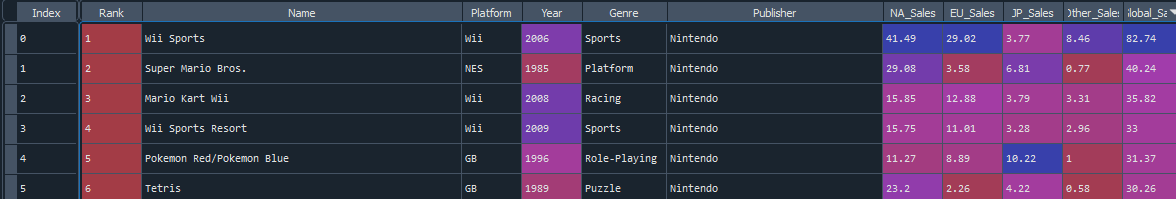

From the check, we can see that there are some null values in Year and Publisher where it would arguably affect our analysis so we will get rid of the rows that does not
have a Year to help with our analysis.

In [20]:
# Drop any rows that has a missing "Year"
df = df.dropna(subset=['Year'])

We can also see that the Sales are split in a lot of region so we should validate if Global Sales data is valid or not

In [21]:
# Do some data validation for Global Sales
df['Calculated_Global'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']).round(2)
df['Global_Sales_Diff'] = (df['Global_Sales'] - df['Calculated_Global']).abs()

# In theory, the Global_Sales should have no dfifference with our caclulation


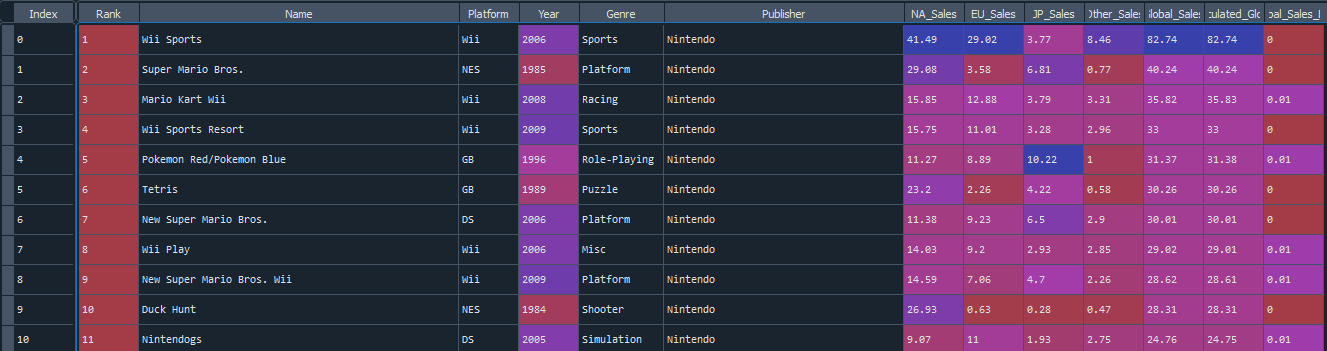

We can see that there are slight difference and also no difference with the value so we can safely assume that the data is valid and usable.

In [22]:
# Filter modern games (2000 onwards)
df = df[df['Year'] > 2000]

We are filtering Games that are above 2000 because we want to make games that are modern and might target a much younger audience

In [23]:
# Saving the claned data for Power BI for Visualisation

df.to_csv("vg_sales_cleaned.csv", index=False)

Once all of the data has been cleaned, we will be doing more analysis where we would do,

1. Market Efficiency Analysis
2. Platform Performance Analysis

In [24]:
# Load cleaned data (from Step 1)
df = pd.read_csv("vg_sales_cleaned.csv")

# Convert sales columns to float (if not already)
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# --- Calculate Genre ROI ---
genre_stats = df.groupby('Genre').agg(
    Avg_Sales=('Global_Sales', 'mean'),  # Mean sales per game
    Competition=('Name', 'count'),       # Number of games in genre
    Total_Sales=('Global_Sales', 'sum')  # Total sales for reference
).reset_index()

# Force float division and handle zero competition
genre_stats['MarketEfficiency'] = (genre_stats['Total_Sales'] / genre_stats['Competition']).round(3)

# Filter out genres with no sales
genre_stats = genre_stats[genre_stats['Avg_Sales'] > 0]

# Sort and show top genres
top_genres = genre_stats.sort_values('MarketEfficiency', ascending=False).head(5)

print(top_genres)

           Genre  Avg_Sales  Competition  Total_Sales  MarketEfficiency
8        Shooter   0.813379         1095       890.65             0.813
4       Platform   0.694395          694       481.91             0.694
10        Sports   0.574473         1896      1089.20             0.574
7   Role-Playing   0.551182         1261       695.04             0.551
6         Racing   0.548669          992       544.28             0.549


After doing the analysis, we will be visualising it using Python and bring it into Power BI

C:\Users\mathe\AppData\Local\Temp\ipykernel_16528\2198396020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


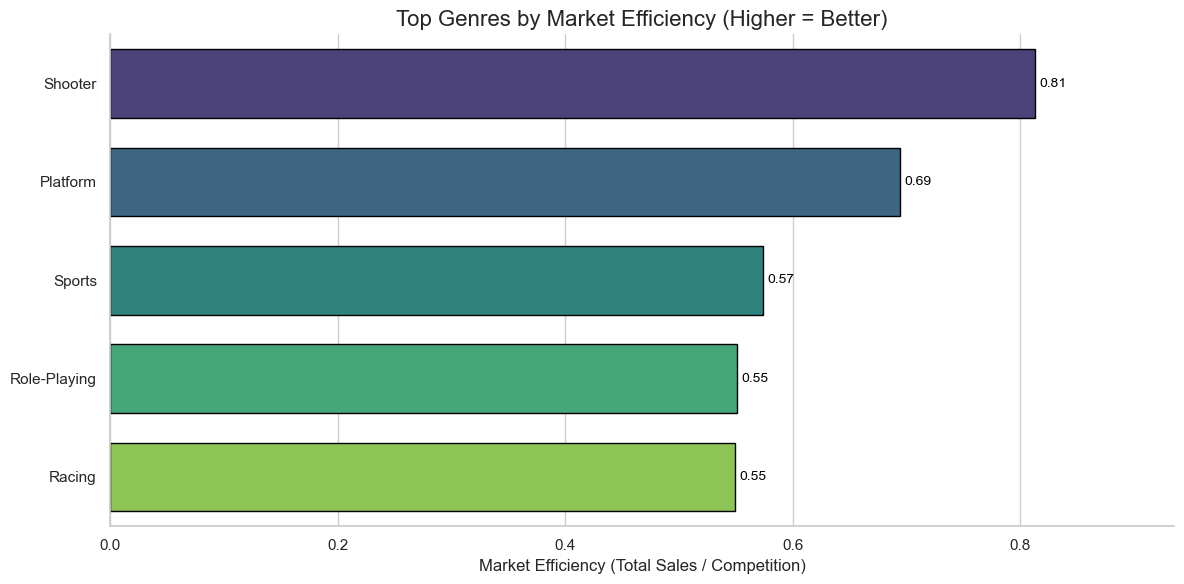

In [25]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")  # Professional style
barplot = sns.barplot(
    x='MarketEfficiency', 
    y='Genre', 
    data=top_genres,
    palette="viridis",  # Color gradient
    edgecolor="black",   # Bar borders
    width=0.7           # Adjust bar width for label spacing
)

# Customize plot
plt.title("Top Genres by Market Efficiency (Higher = Better)", fontsize=16)
plt.xlabel("Market Efficiency (Total Sales / Competition)", fontsize=12)
plt.ylabel("")

# Add data labels with custom formatting
for container in barplot.containers:
    barplot.bar_label(
        container,
        fmt='%.2f',            # Show 2 decimal places
        padding=3,             # Space between bar and label
        fontsize=10,           # Label font size
        color='black',         # Label color
        label_type='edge'      # Place labels at bar edges
    )

# Adjust x-axis limit to prevent label cutoff
plt.xlim(right=top_genres['MarketEfficiency'].max() * 1.15)  # Add 15% padding

sns.despine()  # Remove top/right spines
plt.tight_layout()
plt.savefig("genre_marketefficiency.png", dpi=300, bbox_inches='tight')  # Save for reports
plt.show()

We can see that Shooter has a better Market Efficiency meaning that Shooters generally sells better as a game and we should create a game by using the Shooter Genre

Next, we should see what Platform is the best to make the Shooter Game in and see what works well

C:\Users\mathe\AppData\Local\Temp\ipykernel_16528\3221363969.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


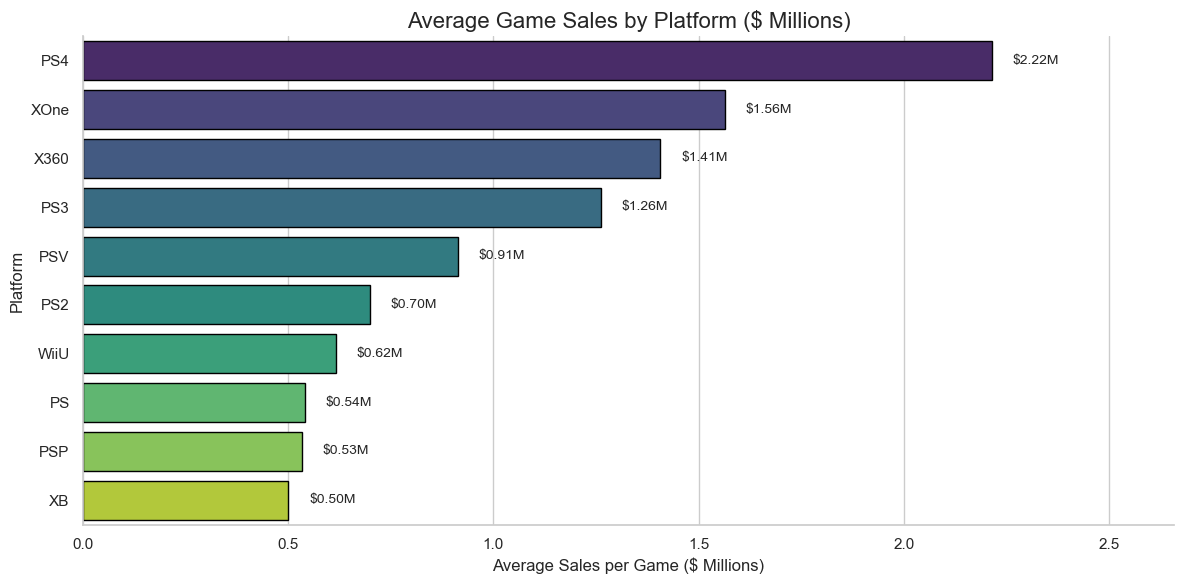

In [26]:
# Filter for Shooters
shootersdata = df[df['Genre'] == 'Shooter']

# Group by Platform
platform_stats = shootersdata.groupby('Platform').agg(
    Avg_Sales=('Global_Sales', 'mean'),
    Num_Games=('Name', 'count')
).sort_values('Avg_Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Avg_Sales',
    y=platform_stats.index,
    data=platform_stats.reset_index(),
    palette='viridis',
    edgecolor='black'
)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 0.05,                      # X-position (just right of bar)
        p.get_y() + p.get_height() / 2,    # Y-position (middle of bar)
        f'${width:.2f}M',                  # Format: $1.23M
        ha='left',                         # Horizontal alignment
        va='center',                       # Vertical alignment
        fontsize=10
    )

# Customize
plt.title("Average Game Sales by Platform ($ Millions)", fontsize=16)
plt.xlabel("Average Sales per Game ($ Millions)")
plt.ylabel("Platform")
plt.xlim(0, platform_stats['Avg_Sales'].max() * 1.2)  # Add space for labels
sns.despine()
plt.tight_layout()
plt.savefig("TopPlatform.png", dpi=300, bbox_inches='tight')  # Save for reports
plt.show()

We see that Playstation 4 has a much more bigger difference between all of the Platforms and by using the data that we get, we will create a game that would be a Shooter Game for PS4

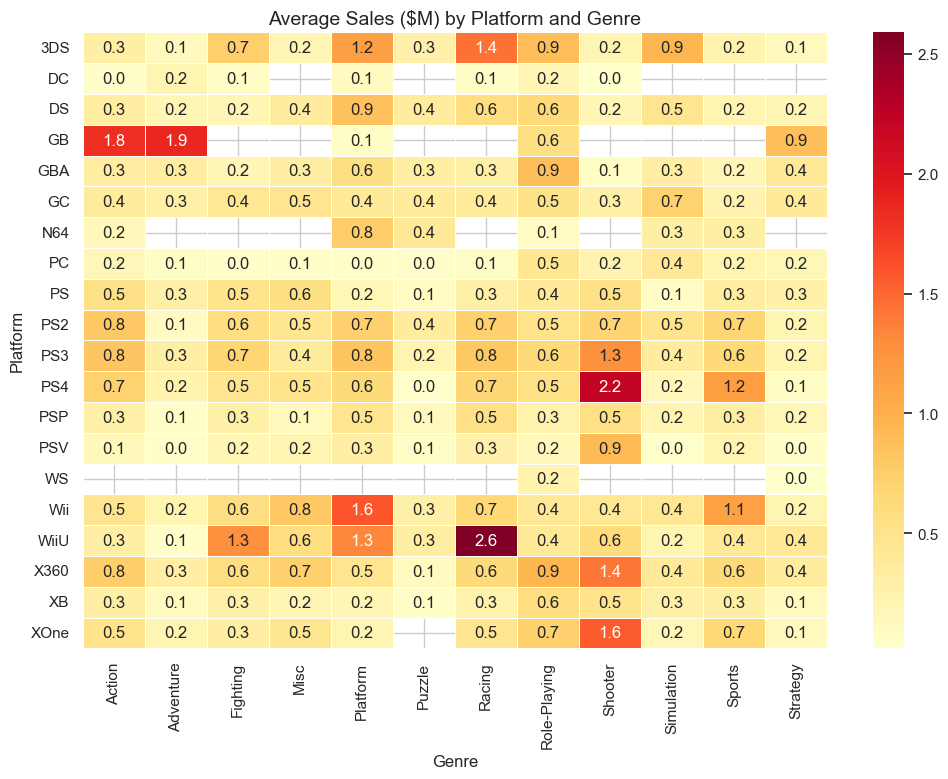

In [27]:
# Pivot table
heatmap_data = df.pivot_table(
    index='Platform', 
    columns='Genre', 
    values='Global_Sales', 
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True,              # Show values in cells
    fmt='.1f',              # Format to 1 decimal place
    cmap='YlOrRd',          # Color scale
    linewidths=0.5          # Grid lines
)
plt.title("Average Sales ($M) by Platform and Genre", fontsize=14)
plt.show()

The Heatmap is additional information for stakeholders to see if they were to inquire about other Genres' Performance on different platforms.

That concludes all of the analysis that we are going to do in Python and we will be visualising all of it in Power BI for a much more easier understanding for stakeholders.

Executive Summary

During our analysis, we managed to get some Key Insights that were beneficial for us :

1. Market Efficiency

The Top 5 Genres are Shooters, Platform, Sports, Role-Playing, and Racing. The highest is Shooters with a 0.81 Market Efficiency Rate meaning that it has a high demand but limited supply, so we will be able
to target the demand that customers want at the current moment.

2. Platform Performance

By filtering to only the Shooters Genre, we have a high average sales per game for the Playstation 4 Platform meaning that we can get a High Revenue Potential in the PS4 Platform than any other. The PS4 has
an average sales per game of 2.2 Millions compared to its competitor which is the XboxOne with 1.56 Millions so that narrows down
the platform of which we will develop our game to mainly PS4.


Conclusion

    Mind Games will develop their Shooter Game in the PS4 Platform and hopefully get a high Revenue Potential with all of the given data that we have analysed.
